# Keras Tutorial
Tutorial przygotowany z:
- Python 3.7
- Jupyter Labs
- Virutal Environment
- Tensorflow backend

# Spis treści:
- [Keras Tutorial](#keras-tutorial)
- [Instalacja z Repozytorium](#instalacja-z-repozytorium)
- [Keras](#keras)
- [Teoria](#podstawy-&-teoria)
- [Użycie](#uzycie)

Repozytorium z kodem: [Github](https://github.com/Isur/keras-training)

# Instalacja z Repozytorium
## Środowisko Wirtualne
### Tworzenie
Linux: `python3.7 -m venv venv`

Windows: `py -m venv venv`
### Aktywacja
Linux: `source ./venv/bin/activate`

Windows: `.\venv\Scripts\activate`
## Instalacja paczek
`pip install -r req.txt`
## Struktura projektu
`venv` - folder środowiska wirtualnego

`docs` - jupyter notebooks, dokumentacja

`src` - pliki źródłowe

`req.txt` - zależności

`app.py` - plik wejściowy, do uruchomienia aplikacji

# Keras
## Czym jest Keras
Keras jest wysokopoziomowym API dla sieci neuronowych, działa z wykorzystaniem `TensorFlow`, `CNTK` lub `Theano`.

Dokumentacja [Keras.io](https://keras.io/)

**Keras** znaczy "róg" w języku greckim.

## Cechy
- łatwy i szybki w implementacji - przyjazny dla użytkowników, modularny, rozszerzalny
- wspiera konwolucyjne oraz rekurencyjne sieci jak i ich kombinacje
- wykorzystuje CPU oraz GPU

# Podstawy & teoria
## Modele
Podstawą jest `model`, za pomocą którego możemy organizować warstwy.

Podstawowym modelem jest `Sequential` - linowy stos wartsw.

Możemy stworzyć model przez przekazanie listy warstw do konstruktora.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Można również skorzystać z funkcjonalnego API, które daje więcej możliwości, lub od podstaw stworzyć własny model.

Dodawanie kolejnych warstw odbywa się przez metodę `.add()`.

In [28]:
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

## Kształt wejścia
Dla modelu musi zostać określony kształt (`input shape`). Wystarczy to określić dla pierwszej warstwy. Jest kilka możliwości aby to zrobić:
- przekazanie `input_shape` jako argument dla pierwszej warstwy,
- przekazanie `input_dim` jako argument dla niektórych warstw 2D takich jak `Dense`, niektóre warstwy 3D przyjmują również `input_length`,
- gdy trzeba określić rozmiar zestawu danych (fixed batch size) można przekazać argument `batch_size`. W przypadku podania `batch_size=32` oraz `input_shape(6,8)` do warstwy, to każdy zestaw danych będzie wymagał kształtu `(32, 6, 8)`

Przykład warstw, które będą identyczne:

In [29]:
model = Sequential()
model.add(Dense(32, input_shape=(784,)))

In [30]:
model = Sequential()
model.add(Dense(32, input_dim=784))

## Warstwy
Warstwy są podstawowymi blokami sieci neuronowych, składają się z funkcji obliczeniowych wejściowych i wyjściowych oraz stanu (wagi).
Instancje warstwy można wywołać jak funkcje.

In [31]:
from keras import layers
import tensorflow as tf
layer = layers.Dense(32, activation='relu')
inputs = tf.random.uniform(shape=(10, 20))
outputs = layer(inputs)

## Funkcja aktywacji
Na podstawie tej funkcji obliczane są wartości wyjścia z neruonu sieci.
Dostępne funkcje to:
- relu
- sigmoid
- softmax
- softplus
- softsign
- tanh
- selu
- elu
- exponential
Istnieje również możliwośc tworzenie własnych funkcji, lub korzystanania np. z funckji `Tensorflow`.

## Funkcja straty
Zwana również funkcją kosztu (`loss function`, `cost function`).
Celem jest utworzenie takiego modelu, aby wartość tej funckji była jak najniższa.
Dostępne funkcje dzielą się na trzy kategorie:
- straty probabilistyncze,
- straty regresji,
- straty dla klasyfikacji maksymalnego marginesu (`hinge losses for maximum-margin classification`)

## Optymalizatory
Wybranie optymalizatora (`optimizer`) jest konieczne do kompilacji modelu.
Można go przekazać jako instancje albo identyfikator. Przy tworzeniu optymalizatora można określi jego tempo uczenia się.

In [32]:
import keras
model = keras.Sequential()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt)
model.compile(loss="categorical_crossentropy", optimizer="adam")

Dostępne optymaliztory to:
- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

## Metryki (wskaźniki)
Metryki są wykorzystywane do oceny wydajności modelu.
Podział metryk:
- wskaźniki dokładności,
- wskaźniki probabilistyczne,
- wskaźniki regresyjne,
- klasyfikacja prawda/fałsz,
- wskaźniki segmentacji obrazu
- `hinge metrics` dla maksymalnego marginesu 

# Użycie
## Wymagane importy
W tym przykładzie wykorzystany będzie do wczytania danych `numpy`, oraz modele (`models`) i warstwy (`layers`) z `keras`.

In [33]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

## Wczytywanie danych
Jako przykładowe dane został wykorzystany dataset: [Prima Indians Diabetes](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) ([Szczegóły](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names))

Do wczytania danych z pliku wykorzystujemy bibliotekę `numpy` i jej metodę `loadtxt`.

In [34]:
dataset = loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
x = dataset[:,0:8]
y = dataset[:,8]

Dane wczytane do `x` to nasze zmienne wejściowe, a `y` to zmienna wyjściowa. `y = f(x)`. Opis kolejnych kolumn z pliku csv:
Wejściowe (`x`):
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
Wyjściowe (`y`):
   1. Class variable (0 or 1)
   
Naszym celem będzie nauczyć sieć aby na podstawie podanych danych, dopasować klasę (`0` lub `1`).

## Tworzenie modelu
Model za pomocą którego będziemy organizować warstwy to `Sequential`.
Należy pamiętać o tym, aby wejściowa warstwa posiadała argument `input_dim` zgodny z liczbą danych wejściowych, czyli w naszym przypadku 8 ponieważ mamy 8 zmiennych.
Dla przykładu wykorzystamy strukturę z w pełni połączonymi trzema warstwami (rozmiar sieci jest zależny od problemu jaki ma ona rozwiązywać).
Połączone warstwy zapewnia nam klasa `Dense`, w której możemy sprecyzować liczbę neuronów i funkcję aktywacji.
Jako funkcję aktywacji dla pierwszych dwóch warstw wykorzystamy `ReLu` (Rectified Linear Unit), a dla ostatniej funkcję sigmoidalną, która zapewni nam wynik między 0 a 1.

In [35]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Tak zdefiniowany model daje nam 3 warstwy, gdzie wejściem jest 8 zmiennych,
- pierwsza warstwa obsługuje 16 neuronów oraz wykorzystuje funkcje aktywacji `relu`, tutaj należy pamiętać o tym, aby pierwsza warstwa miałą zdefiniowane wejście,
- druga warstwa obsługuje 8 neuronów oraz wykorzystuje funkcje aktywacji `relu`,
- trzecia, ostatnia warstwa z jednym neuronem z funkcją sigmoidalną.

## Kompilacja
Po zdefiniowaniu modelu możemy go skompilować. Wykorzystany do tego jest `backend` w postaci biblioteki `Tensorflow`, `Theano` lub `CNTK`. Pozwala on na odpowiednie wykorzystanie naszego sprzętu (CPU, GPU).
Podczas kompilacji należy sprecyzować pewne ustawienia dla naszej sieci, a są to:
- funckja staty - `loss` - wykorzystawana do oszacowania zestawu wag, w tym przypadku będzie to funkcja krzyżowej entropii (cross entropy), gdzie w bibliotece Keras jest zdefiniowana jako `binary_crossentropy`,
- optymalizator - `optimizer` - wybór algorytmu optymalizacyjnego, w tym przypadku będzie to `adam`,
- metryki - `metrics` - metryki, które zbieramy jako wynik, w tym przypadku będzie to `accuracy`, czyli trafność dopasowań.

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Dopasowanie
Zdefiniowany i skompilowany model jest teraz gotowy do obliczeń. Możemy nauczyć go wykorzystując metodę `fit`.
Musimy ustalić:
- `epochs` - liczba przejść przez wszystkie wiersze trenowanego modelu,
- `batch` - liczba próbek rozważanych przy każdym przejściu przed aktualizacja wag,
- wejście - kolumny wejściowe,
- wyjście - wyniki
Liczby `epoch` i `batch` możemy dobierać metodą prób i błędów, aż uda nam się wystarczająco dobrze wytrenować model.
Dla tego przykładu użyjemy następujących ustawień:

In [37]:
model.fit(x, y, epochs=250, batch_size=10, verbose=0)

Ustawienie `verbose=0` powoduje, że konsola nie wypisuje każdego przejścia.
## Oszacowanie
Wytrenowany model można teraz wykorzystać do oszacowania danych. Zbiór danych można podzielić na dane treningowe i dane do oceny, albo do obu przypadków wykorzystać ten sam zestaw danych.

Szacowanie da nam stary modelu oraz trafność.

In [38]:
loss, accuracy = model.evaluate(x,y, verbose=0)
print(f"Accuracy: {accuracy}")
print(f"Data loss: {loss}")

Accuracy: 0.80859375
Data loss: 0.42181142171223956


Idealna sytuacja byłaby wtedy, gdy trafność naszego modelu wynosiła bo 100%, a stata 0%, jednak jest to praktycznie niemożliwe.

## Prognozy
Wykorzystując metodę `predict`, gdzie dzięki wykorzystaniu funkcji sigmoidalnej mamy wyniki między 0 a 1, możemy je zaokrąglić i wykorzystać, lub `predict_classes` możemy wyznaczyć prognozy dla danych.

In [39]:
predictions = model.predict(x)
rounded = [round(x[0]) for x in predictions]
for i in range(7):
    print('%s => %d (expected %d)' % (x[i].tolist(), rounded[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)


In [40]:
predictions = model.predict_classes(x)
for i in range(7):
    print('%s => %d (expected %d)' % (x[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)


Zgodnie z wcześniej wyznaczoną trafnością, część danych może nie zostać przewidziana tak jak powinna.

## Zapis modelu
Model można zapisać do pliku w celu późniejszego użycia.
Wykorzystując metode `save` możemy zapisać cały model wraz z:
- wagami
- architekturą
- ustawieniami kompliacji
- stanem optymalizatora

In [41]:
model.save("./saved.h5")

Można również zapisać dany model do pliku `json`:

In [42]:
model_json = model.to_json()
with open("./model.json", "w") as json_file:
    json_file.write(model_json)

## Wczytywanie modelu
Wczytanie istniejącego modelu jest możliwe z wykorzystaniem metody `load_model`:

In [43]:
from keras.models import load_model

loaded_model = load_model("./saved.h5")

Możemy wyświetlić podsumowanie z informacjami na temat danego modelu:

In [44]:
loaded_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


Teraz możemy wykorzystać wczytany model:

In [45]:
new_dataset = loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
i = dataset[:,0:8]
j = dataset[:,8]
score = loaded_model.evaluate(i, j, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
predicts = loaded_model.predict_classes(i)
for k in range(15):
    print('%s => %d (expected %d)' % (i[k].tolist(), predicts[k], j[k]))

accuracy: 80.86%
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 1 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 5

## Wykres historii
Na wykresie możemy pokazać historie trafności i straty modelu. W tym celu możemy wykorzystać bibliotekę `matplotlib`.
Z metody `fit` dostajemy historię, którą możemy zaprezentować na wykresie.

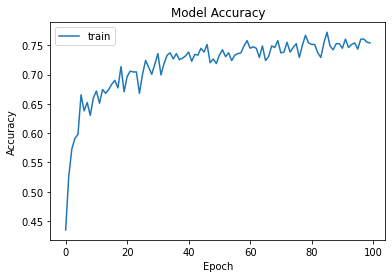

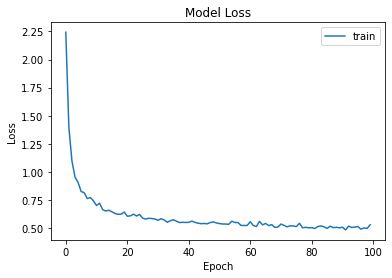

In [47]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
dataset = loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
x = dataset[:,0:8]
y = dataset[:,8]
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=100, batch_size=15, verbose=0)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()